# Comparison of results at regional and national cross country championships.

In this notebook, we compare finish positions of athletes at the regional (southern, midland and northern) cross championship with the same athletes finish positions at the national. A detailed write up and some media coverage is linked below.

1. https://medium.com/@willmycroft/the-relative-strength-of-the-regional-cross-country-championships-and-the-poor-away-form-of-115595cc648f
2. https://www.fastrunning.com/opinion/are-the-southern-xc-champs-tougher-than-the-northerns/11653

In [1]:
from poweroften import PowerOfTen
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Hard code the ids of races
southerns = [180451, 147555, 118060, 91541, 78418, 55654]
midlands = [180591, 147558, 117912, 92127, 71648, 56665]
northerns = [180475, 147503, 117924, 92906, 71476, 55677]
national = [180472, 146937, 117902, 91548, 70255, 56047]
years = [2012, 2013, 2014, 2015, 2016, 2017]
age_group = 'SM' # Age group, e.g. SM, SW, U20M, U20W etc.

In [3]:
# Download data
po10 = PowerOfTen(False)
results = {}
for race_id  in southerns + midlands + northerns + national:
    race_results = po10.get_results(race_id)
    race_key = list(filter(lambda x : age_group in x, race_results.keys()))
    if len(race_key) == 0:
        raise Exception('Could not find race ' + str(race_id))
    else:
        race_key = race_key[0]
        
    # Store position and athlete id for those with a valid athlete id and pos
    valid = (race_results[race_key].AthleteId >= 0) & race_results[race_key].Pos.str.isdigit()
    results[race_id] = race_results[race_key][valid].Pos.astype(int)
    results[race_id].index = race_results[race_key][valid].AthleteId.values
    results[race_id].name = race_id           

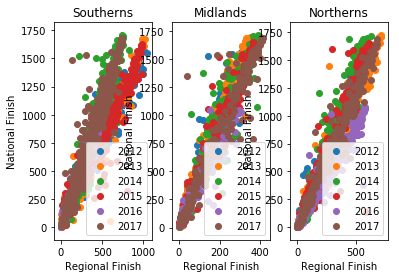

In [4]:
# Plot regional position against national position
fig = plt.figure()
s_ax, m_ax, n_ax = fig.subplots(1, 3)
for s_id, m_id, n_id, nat_id in zip(southerns, midlands, northerns, national):
    # Get athletes who did both regionals and nationals
    south = pd.concat([results[s_id], results[nat_id]], join='inner', axis=1)
    s_ax.scatter(south[s_id], south[nat_id])
    mid = pd.concat([results[m_id], results[nat_id]], join='inner', axis=1)
    m_ax.scatter(mid[m_id], mid[nat_id])
    north = pd.concat([results[n_id], results[nat_id]], join='inner', axis=1)
    n_ax.scatter(north[n_id], north[nat_id])
    
s_ax.set_title('Southerns')
m_ax.set_title('Midlands')
n_ax.set_title('Northerns')

for ax in [s_ax, m_ax, n_ax]:
    ax.set_xlabel('Regional Finish')
    ax.set_ylabel('National Finish')    
    ax.legend(years, loc=4)